### Aplicação do modelo de análise de sentimento no dataset de publicações do twitter

### Preparando o dataset

In [1]:
import pandas as pd
import numpy as np

# !pip install clean-text
# from cleantext import clean
# import nltk
# nltk.download('popular')
from nltk.tokenize import TweetTokenizer
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# from string import punctuation
from nltk.stem.wordnet import WordNetLemmatizer

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# argentina = pd.read_csv('/content/drive/MyDrive/Blue Edtech 1semestre/Módulo 7/data/AR_data.csv')
# chile = pd.read_csv('/content/drive/MyDrive/Blue Edtech 1semestre/Módulo 7/data/CL_data.csv')
# equador = pd.read_csv('/content/drive/MyDrive/Blue Edtech 1semestre/Módulo 7/data/EQ_data.csv')
# espanha = pd.read_csv('/content/drive/MyDrive/Blue Edtech 1semestre/Módulo 7/data/ES_data.csv')
# mexico = pd.read_csv('/content/drive/MyDrive/Blue Edtech 1semestre/Módulo 7/data/MX_data.csv')

In [12]:
# mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65028 entries, 0 to 65027
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  65028 non-null  int64  
 1   text        65028 non-null  object 
 2   score       65028 non-null  float64
 3   retweet     65028 non-null  int64  
 4   like        65028 non-null  int64  
 5   date        65028 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 3.0+ MB


In [6]:
# argentina.head()

,Unnamed: 0,text,score,retweet,like,date,lat,long
0,0,La OMS estima que no habrá vacuna contra el co...,0.0,0,1,2020-02-11,-34.604450,-58.446244
1,1,"Coronavirus: covid-19, la enfermedad del nuevo...",0.0,0,0,2020-02-11,-34.604450,-58.446244
2,2,"No digas virus chino o enfermedad china, porqu...",0.0,0,0,2020-02-11,-34.604450,-58.446244
3,3,Coronavirus Covid-19: paciente contagiada fue ...,0.0,0,2,2020-02-12,-32.951572,-60.693506
4,4,Coronavirus Covid-19: paciente contagiada fue ...,0.0,1,1,2020-02-12,-32.951572,-60.693506


In [3]:
# incluindo a coluna país para concatenar todos os datasets em um

# lista = []
# for i in range(0,62117):
#   lista.append('argentina')
# argentina['país'] = lista

# lista = []
# for i in range(0,52650):
#   lista.append('chile')
# chile['país'] = lista

# lista = []
# for i in range(0,34587):
#   lista.append('equador')
# equador['país'] = lista

# lista = []
# for i in range(0,66176):
#   lista.append('espanha')
# espanha['país'] = lista

# lista = []
# for i in range(0,65028):
#   lista.append('mexico')
# mexico['país'] = lista

In [4]:
# publicacoes = pd.concat([argentina, chile, equador, espanha, mexico])

In [13]:
# publicacoes.head()

,Unnamed: 0,text,score,retweet,like,date,lat,long,país
0,0,La OMS estima que no habrá vacuna contra el co...,0.0,0,1,2020-02-11,-34.604450,-58.446244,argentina
1,1,"Coronavirus: covid-19, la enfermedad del nuevo...",0.0,0,0,2020-02-11,-34.604450,-58.446244,argentina
2,2,"No digas virus chino o enfermedad china, porqu...",0.0,0,0,2020-02-11,-34.604450,-58.446244,argentina
3,3,Coronavirus Covid-19: paciente contagiada fue ...,0.0,0,2,2020-02-12,-32.951572,-60.693506,argentina
4,4,Coronavirus Covid-19: paciente contagiada fue ...,0.0,1,1,2020-02-12,-32.951572,-60.693506,argentina


In [5]:
# removendo emoji

# publicacoes['text'] = publicacoes['text'].apply(lambda x: clean(x, no_emoji=True))

In [6]:
# tokenizando

# tt = TweetTokenizer()
# publicacoes['text'] = publicacoes['text'].apply(tt.tokenize)

In [7]:
# removendo stopwords e pontuações

# stopwords = set(stopwords.words('spanish') + list(punctuation))
# publicacoes['text'] = publicacoes['text'].apply(lambda x: ' '.join([word for word in x if word not in (stopwords)]))

In [8]:
# publicacoes.to_csv('publicacoes', index = False)

In [29]:
# publicacoes['text'].head()

0    [oms, estima, habra, vacuna, coronavirus, dent...
1    [coronavirus, covid, 19, enfermedad, nuevo, vi...
2    [digas, virus, chino, enfermedad, china, polit...
3    [coronavirus, covid, 19, paciente, contagiada,...
4    [coronavirus, covid, 19, paciente, contagiada,...
Name: text, dtype: object

In [2]:
publicacoes = pd.read_csv('/content/drive/MyDrive/Blue Edtech 1semestre/Módulo 7/data/publicacoes')
train = pd.read_csv('/content/drive/MyDrive/Blue Edtech 1semestre/Módulo 7/data/treino')

In [3]:
# TOKENIZAÇÃO
tk = Tokenizer()

# FIT ON TRAIN 
tk.fit_on_texts(train['review_es'].apply(str))

# TOKENIZANDO O DATASET DE TREINO
tk_publicacoes = tk.texts_to_sequences(publicacoes['text'].apply(str))

# PADDING A SEQUENCIA DE TREINO
publicacoes_pad = pad_sequences(tk_publicacoes,padding="post",maxlen = 725)

In [4]:
publicacoes.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
dicionario = tk.word_index

### Carregando o modelo treinado

In [6]:
from keras.models import model_from_json

In [47]:
# load json and create model
json_file = open('/content/drive/MyDrive/Blue Edtech 1semestre/Módulo 7/data/model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Blue Edtech 1semestre/Módulo 7/data/model2.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
predicao = loaded_model.predict(publicacoes_pad)

 989/8768 [==>...........................] - ETA: 27:23

In [ ]:
lista = []
for i in range(0,280558):
  soma = 0
  for j in range(0,725):
    soma = predicao[i][j] + soma
  pontuacao = soma/725
  if pontuacao < 0.5:
    lista.append(0)
  else:
    lista.append(1)
publicacoes['prediction'] = lista

In [10]:
print(publicacoes[['text','prediction']])

                                                     text  prediction
0       oms estima habra vacuna coronavirus dentro 18 ...           1
1       coronavirus covid 19 enfermedad nuevo virus su...           1
2       digas virus chino enfermedad china politicamen...           1
3       coronavirus covid 19 paciente contagiada liber...           1
4       coronavirus covid 19 paciente contagiada liber...           1
...                                                   ...         ...
280553  @claudiashein si discriminacion hablamos hora ...           1
280554     malditas pruebas covid https://t.co/rd7adpqhnz           1
280555  @manumanuti hehehehe not surprised it's probab...           1
280556  amiguitos dio covid perdieron olfato gusto cua...           1
280557  buenos dias informamos motivos condiciones cli...           1

[280558 rows x 2 columns]


In [ ]:
publicacoes['prediction'].value_counts()

In [12]:
# publicacoes.to_csv('publicacoes_final', index = False)

In [13]:
# converte a coluna de date time

publicacoes['date'] = pd.to_datetime(publicacoes.date, format="%Y-%m-%d")

In [15]:
publicacoes['date'].min()

Timestamp('2020-02-11 00:00:00')

In [16]:
publicacoes['date'].max()

Timestamp('2021-12-31 00:00:00')

In [21]:
# selecionado um intervalo de tempo no dataset

# import datetime

# data_inicio = datetime.datetime(2020, 2, 1)
# data_final = datetime.datetime(2020, 7, 31)

# df_analise = publicacoes[(data_inicio <= publicacoes['date']) &  (data_final > publicacoes['date']) ]

In [22]:
# df_analise.to_csv('df_analise', index = False)

### Teste de hipótese

É possível identificar os sintomas mais comuns da COVID por meio da análise das palavras mais frequentes das publicações do tweet?

In [24]:
# tokenizando

tt = TweetTokenizer()
publicacoes['text'] = publicacoes['text'].apply(tt.tokenize)

In [25]:
# Lemmatise

lmtzr = WordNetLemmatizer()
publicacoes['text'] = publicacoes['text'].apply(lambda x: [lmtzr.lemmatize(word) for word in x])

LookupError: ignored

In [91]:
publicacoes['text']

0        [oms, estima, habra, vacuna, coronavirus, dent...
1        [coronavirus, covid, 19, enfermedad, nuevo, vi...
2        [digas, virus, chino, enfermedad, china, polit...
3        [coronavirus, covid, 19, paciente, contagiada,...
4        [coronavirus, covid, 19, paciente, contagiada,...
                               ...                        
65023    [@claudiashein, si, discriminacion, hablamos, ...
65024    [malditas, pruebas, covid, https://t.co/rd7adp...
65025    [@manumanuti, hehehehe, not, surprised, it's, ...
65026    [amiguitos, dio, covid, perdieron, olfato, gus...
65027    [buenos, dia, informamos, motivos, condiciones...
Name: text, Length: 280558, dtype: object

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

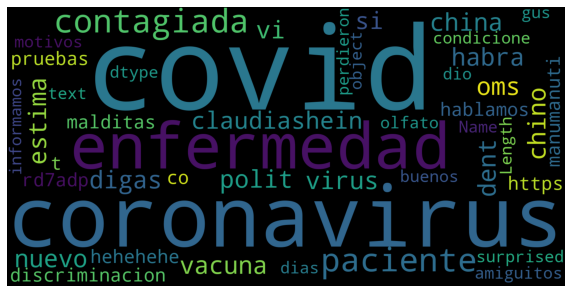

In [27]:
# gerar uma wordcloud
wordcloud = WordCloud(background_color="black",
                      width=1600, height=800).generate(str(publicacoes['text']))
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

In [28]:
lista_palavras = publicacoes['text'].tolist()

In [45]:
str(lista_palavras).count('covid')

290572

In [46]:
str(lista_palavras).count('enfermedad')

3396

In [42]:
str(lista_palavras).count('coronavirus')

16502

In [29]:
str(lista_palavras).count('febre')

970

In [40]:
# import nltk
# nltk.download('punkt')
# from nltk.probability import FreqDist
# from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [41]:
# fdist = FreqDist(word.lower() for word in word_tokenize(lista_palavras))
# freq.plot(20)

TypeError: ignored